The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
(b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows and columns represent?


In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx", sheet_name = 'Sheet1')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [248]:
df.shape

(9568, 5)

<b>There are 9568 rows and 5 columns. Each of the column represents a particular feature when the power plant is working with the full load. Each of the rows contains hourly collected data about all features. AT stands for ambient variable temperature, V stands for exhaust vacuum, AP is the ambient pressure, RH refers to the relative humidity, and PE stands for plant electrical energy output. </b>

 
ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

Most of the scatterplots between the two variables don't have a significant sign of relationship. However, there are 3 variables that seem to have a relatively close relationship: AT, PE, and V. The covariance between AT and V seems to be positive, whereas the covariance between AT&PE, and between AT&V seems to be negative. 


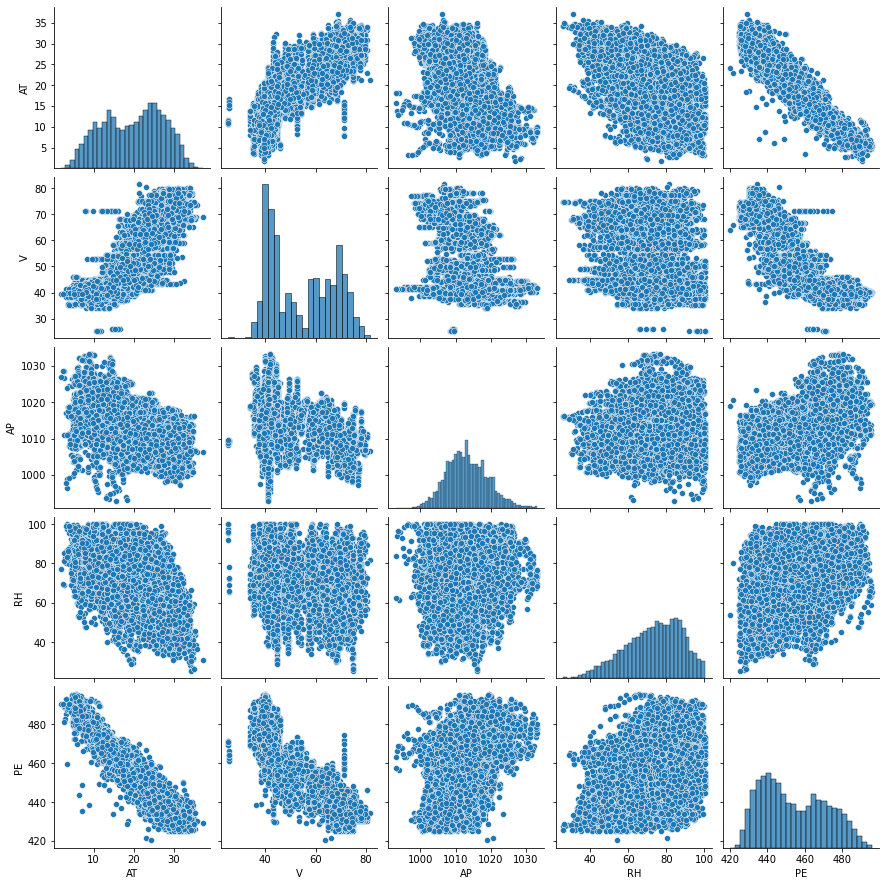

In [249]:
scatterplt = sns.pairplot(df)
print("Most of the scatterplots between the two variables don't have a significant sign of relationship. However, there are 3 variables that seem to have a relatively close relationship: AT, PE, and V. The covariance between AT and V seems to be positive, whereas the covariance between AT&PE, and between AT&V seems to be negative. ")

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [250]:
table = df.describe()
median = df.median()
median.name = 'median'
rang = table.loc['max']-table.loc['min']
rang.name = 'range'
inter = table.loc['75%']-table.loc['25%']
inter.name = 'interquartile range'
table = table.T
summary = pd.concat([table['mean'], median,rang,inter, table['25%'], table['75%']], axis = 1)
summary

,mean,median,range,interquartile range,25%,75%
AT,19.651231,20.345,35.30,12.2100,13.5100,25.72
V,54.305804,52.080,56.20,24.8000,41.7400,66.54
AP,1013.259078,1012.940,40.41,8.1600,1009.1000,1017.26
RH,73.308978,74.975,74.60,21.5025,63.3275,84.83
PE,454.365009,451.550,75.50,28.6800,439.7500,468.43


(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [251]:
import statsmodels.api as sm

X_AT = df['AT']
Y = df['PE']
X_AT = sm.add_constant(X_AT)

model_AT = sm.OLS(Y,X_AT).fit()
print(model_AT.summary())
print("\nThe slope of linear regression model between AT and PE is:", model_AT.params[1])
print("The intercept of the model is:", model_AT.params[0])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:11   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

In [252]:
X_V = df['V']
Y = df['PE']
X_V = sm.add_constant(X_V)

model_V = sm.OLS(Y,X_V).fit()
print(model_V.summary())
print("\nThe slope of linear regression model between V and PE is:", model_V.params[1])
print("The intercept of the model is:", model_V.params[0])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:11   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

In [253]:
X_AP = df['AP']
Y = df['PE']
X_AP = sm.add_constant(X_AP)

model_AP = sm.OLS(Y,X_AP).fit()
print(model_AP.summary())
print("\nThe slope of linear regression model between AP and PE is:", model_AP.params[1])
print("The intercept of the model is:", model_AP.params[0])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:11   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

In [254]:
X_RH = df['RH']
Y = df['PE']
X_RH = sm.add_constant(X_RH)

model_RH = sm.OLS(Y,X_RH).fit()
print(model_RH.summary())
print("\nThe slope of linear regression model between RH and PE is:", model_RH.params[1])
print("The intercept of the model is:", model_RH.params[0])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:11   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

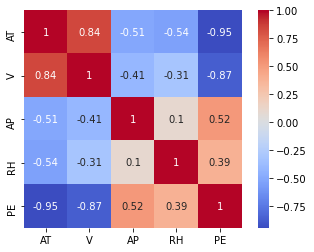

In [255]:
corr_plot = sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', square = True)

<b>All the linear regression models between each predictor and the dependent variable have extremely small p-values, which means that all of the predictors are statistically significant with a close relationship with the response. The association can also be verified by plotting the correlation map between each variables. From the map above, we can see that the predictor 'AT' and 'V' have a much closer correlation with 'PE'. The four plots corresponding to each predictors are shown below. Apparantly, the graphs of AT and V have points more closely clustering around the regression line. </b>

<AxesSubplot:xlabel='V', ylabel='PE'>

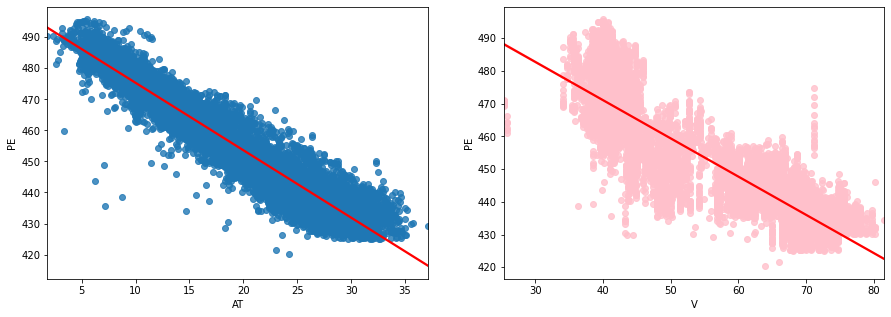

In [256]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)= plt.subplots(1,2, figsize = (15,5))
sns.regplot(x='AT', y = 'PE', data = df, line_kws = {"color": 'red'}, ax = ax1)
sns.regplot(x='V', y = 'PE', data = df, line_kws = {"color": 'red'}, scatter_kws = {"color": "pink"}, ax = ax2)

<AxesSubplot:xlabel='RH', ylabel='PE'>

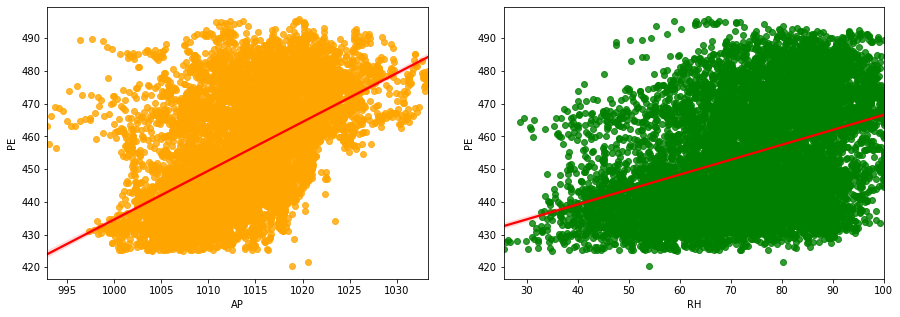

In [257]:
fig, (ax3, ax4)= plt.subplots(1,2, figsize = (15,5))
sns.regplot(x='AP', y = 'PE', data = df, line_kws = {"color": 'red'},scatter_kws = {"color": "orange"}, ax = ax3)
sns.regplot(x='RH', y = 'PE', data = df, line_kws = {"color": 'red'},scatter_kws = {"color": "green"},ax = ax4)

Cooks distance for AT:
 (array([0.00000413, 0.00001112, 0.0000587 , ..., 0.0000018 , 0.00016707,
       0.00001878]), array([0.99999587, 0.99998888, 0.9999413 , ..., 0.9999982 , 0.99983295,
       0.99998122]))
Cooks distance for V:
 (array([0.00004829, 0.00000001, 0.00049331, ..., 0.00000506, 0.00000156,
       0.00007568]), array([0.99995171, 0.99999999, 0.99950681, ..., 0.99999494, 0.99999844,
       0.99992432]))
Cooks distance for AP:
 (array([0.0000551 , 0.0002284 , 0.00032584, ..., 0.00014524, 0.00009445,
       0.00001741]), array([0.99994491, 0.99977163, 0.99967421, ..., 0.99985477, 0.99990555,
       0.99998259]))
Cooks distance for RH:
 (array([0.00001698, 0.00000509, 0.00036988, ..., 0.00010019, 0.00006148,
       0.00000047]), array([0.99998302, 0.99999491, 0.99963019, ..., 0.99989982, 0.99993853,
       0.99999953]))


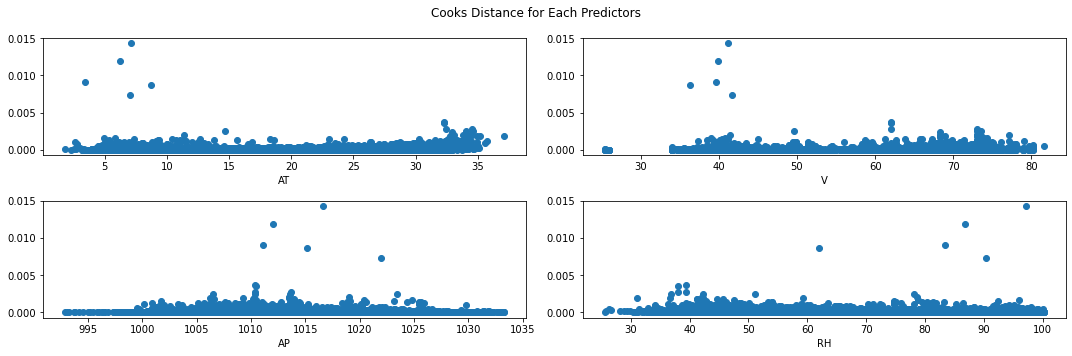

In [258]:
np.set_printoptions(suppress = True)
influence_AT = model_AT.get_influence()
cooks_AT = influence_AT.cooks_distance
print("Cooks distance for AT:\n",cooks_AT)

influence_V = model_V.get_influence()
cooks_V = influence_V.cooks_distance
print("Cooks distance for V:\n",cooks_V)

influence_AP = model_AP.get_influence()
cooks_AP = influence_AP.cooks_distance
print("Cooks distance for AP:\n",cooks_AP)

influence_RH = model_RH.get_influence()
cooks_RH = influence_RH.cooks_distance
print("Cooks distance for RH:\n",cooks_RH)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,5))
fig.suptitle('Cooks Distance for Each Predictors')
ax1.scatter(df['AT'], cooks_AT[0])
ax1.set_xlabel("AT")
ax2.scatter(df['V'], cooks_AT[0])
ax2.set_xlabel("V")
ax3.scatter(df['AP'], cooks_AT[0])
ax3.set_xlabel("AP")
ax4.scatter(df['RH'], cooks_AT[0])
ax4.set_xlabel("RH")

plt.tight_layout()

In [259]:
# the general rule of thumb of outliers:
# any points with Cook's Distance over 4/n. 
# n: the total number of data points. 

threshold = 4/df.shape[0]

outlier_AT = 0
outlier_V = 0
outlier_AP = 0
outlier_RH = 0

for i in cooks_AT[0]:
    if i > threshold:
        outlier_AT += 1
        
for i in cooks_V[0]:
    if i > threshold:
        outlier_V += 1
        
for i in cooks_AP[0]:
    if i > threshold:
        outlier_AP += 1
        
for i in cooks_RH[0]:
    if i > threshold:
        outlier_RH += 1

print("There are", outlier_AT, "outliers in the model of AT & PE that may need to be removed.")
print("There are", outlier_V, "outliers in the model of V & PE that may need to be removed.")
print("There are", outlier_AP, "outliers in the model of AP & PE that may need to be removed.")
print("There are", outlier_RH, "outliers in the model of RH & PE that may need to be removed.")

There are 416 outliers in the model of AT & PE that may need to be removed.
There are 423 outliers in the model of V & PE that may need to be removed.
There are 300 outliers in the model of AP & PE that may need to be removed.
There are 249 outliers in the model of RH & PE that may need to be removed.




(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

<b>Based on the linear regression model generated from multiple predictors, we can easily see that all of the variables have a p-value smaller than 0.05, which means that all of them are statistically significant in this case. We can reject the null hypothesis for all four predictors. </b>

In [260]:
X = df[['AT', 'V', 'AP', 'RH']]
Y = df['PE']

X = sm.add_constant(X)
est = sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


<b>The co-efficient relationship between the results from 1c (univariate regression) and the result from 1d (multiple regression) is shown below. Both results show that all the predictors are statistically significant, but the coefficient for each of the feature is different in two cases, especially the coefficient for RH - it changes from positive to negative. Also, the absolute value for coefficient tends to be smaller in the multiple regression. </b>

[-2.1713199585178002, -1.1681351265557094, 1.4898716733991142, 0.455650102262979]
[-1.9775131066353933, -0.23391642258249778, 0.06208294378085516, -0.15805410291641486]


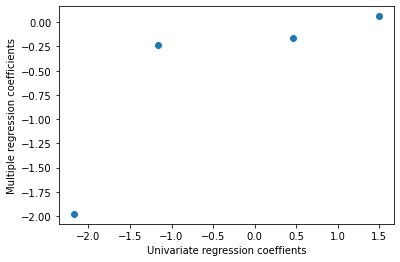

In [261]:
from scipy import stats
uni_coef = [model_AT.params[1], model_V.params[1], model_AP.params[1], model_RH.params[1]]
multi_coef = [est.params[1], est.params[2], est.params[3], est.params[4]]

print(uni_coef)
print(multi_coef)

plt.scatter(uni_coef, multi_coef)
plt.xlabel("Univariate regression coeffients")
plt.ylabel("Multiple regression coefficients")
plt.show()

(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε

In [262]:
from sklearn.preprocessing import PolynomialFeatures

x_AT = df['AT'].values.reshape(-1,1)
poly_AT = PolynomialFeatures(3)
beta_AT = poly_AT.fit_transform(x_AT)
print(beta_AT)

[[    1.          14.96       223.8016    3348.071936]
 [    1.          25.18       634.0324   15964.935832]
 [    1.           5.11        26.1121     133.432831]
 ...
 [    1.          31.32       980.9424   30723.115968]
 [    1.          24.48       599.2704   14670.139392]
 [    1.          21.6        466.56     10077.696   ]]


In [263]:
est_AT = sm.OLS(Y, beta_AT).fit()
print("There is a non-linear association between AT and PE, because the p-value for orgincal term, quadratic term, and trinomial term are smaller than 0.05.")
est_AT.summary()

There is a non-linear association between AT and PE, because the p-value for orgincal term, quadratic term, and trinomial term are smaller than 0.05.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
x_V = df['V'].values.reshape(-1,1)
poly_V = PolynomialFeatures(3)
beta_V = poly_V.fit_transform(x_V)
est_V = sm.OLS(Y, beta_V).fit()
print("There is a non-linear association between V and PE, because the p-value for both orgincal term and trinomial term are smaller than 0.05.")
est_V.summary()

There is a non-linear association between V and PE, because the p-value for both orgincal term and trinomial term are smaller than 0.05.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
x_AP = df['AP'].values.reshape(-1,1)
poly_AP = PolynomialFeatures(3)
beta_AP = poly_AP.fit_transform(x_AP)
est_AP = sm.OLS(Y, beta_AP).fit()
print("There is a non-linear association between AP and PE, because the p-value for orgincal term, quadratic term and trinomial term are smaller than 0.05.")
est_AP.summary()

There is a non-linear association between AP and PE, because the p-value for orgincal term, quadratic term and trinomial term are smaller than 0.05.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
x_RH = df['RH'].values.reshape(-1,1)
poly_RH = PolynomialFeatures(3)
beta_RH = poly_RH.fit_transform(x_RH)
est_RH = sm.OLS(Y, beta_RH).fit()
print("There is a non-linear association between RH and PE, because the p-value for the orgincal term, the quadratic term, and trinomial term are smaller than 0.05.")
est_RH.summary()

There is a non-linear association between RH and PE, because the p-value for the orgincal term, the quadratic term, and trinomial term are smaller than 0.05.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.


In [267]:
x = df[['AT', 'V', 'AP', 'RH']]

poly = PolynomialFeatures(interaction_only = True)
interaction = poly.fit_transform(x)
print(interaction)
dataset = pd.DataFrame({'constant': interaction[:, 0], 'AT': interaction[:, 1], 'V': interaction[:, 2], 'AP': interaction[:, 3], 'RH': interaction[:, 4], 'AT*V': interaction[:, 5], 'AT*AP': interaction[:, 6], 'AT*RH': interaction[:, 7], 'V*AP': interaction[:, 8], 'V*RH': interaction[:, 9], 'AP*RH': interaction[:, 10]})
dataset

[[    1.        14.96      41.76   ... 42765.1632  3055.5792 74931.2019]
 [    1.        25.18      62.96   ... 64221.7184  3719.6768 60263.9632]
 [    1.         5.11      39.4    ... 39879.104   3630.316  93260.4224]
 ...
 [    1.        31.32      74.33   ... 75290.3436  2711.5584 36951.3216]
 [    1.        24.48      69.45   ... 70412.577   4332.9855 63254.7254]
 [    1.        21.6       62.52   ... 63597.2196  4243.2324 69039.4001]]


,constant,AT,V,AP,RH,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH
0,1.0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019
1,1.0,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632
2,1.0,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224
3,1.0,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936
4,1.0,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026
...,...,...,...,...,...,...,...,...,...,...,...
9563,1.0,16.65,49.69,1014.01,91.00,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100
9564,1.0,13.19,39.18,1023.67,66.78,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826
9565,1.0,31.32,74.33,1012.92,36.48,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216
9566,1.0,24.48,69.45,1013.86,62.39,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254


In [268]:
est = sm.OLS(Y, dataset).fit()
print("According to the summary table, if we assume that there are interactions between any of the two predictors, the interaction terms that are statistically significant are AT*V, AT*RH, V*AP, and AP*RH. ")
est.summary()

According to the summary table, if we assume that there are interactions between any of the two predictors, the interaction terms that are statistically significant are AT*V, AT*RH, V*AP, and AP*RH. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT*V           0.0210      0.001     23.338      0.000       0.019       0.023
AT*AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT*RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V*AP           0.0068      0.001      5.135      0.000       0.004       0.009
V*RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP*RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# split the dataset with a train test ratio of 7:3
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 0)

# first multi-regression model using randomly selected 70% of dataset. 
model1 = LinearRegression().fit(x_train, y_train)
# predict the response using the model. 
y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)

# calculate the MSE of both train and test.
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("The MSE for training dataset is:", mse_train)
print("The MSE for testing dataset is:", mse_test)

The MSE for training dataset is: 20.941563616739582
The MSE for testing dataset is: 20.36838300288591


regression formula:
b0 + b1*AT + b2*V + b3*AP + b4*RH + b5*AT^2 + b6*AT*V + b7*AT*AP + b8*AT*RH + b9*V^2 + b10*V*AP + b11*V*RH + b12*AP^2 + b13*AP*RH + b14*RH^2

In [270]:
# second multi-regression model with other interaction terms and quadratic nonlinear terms. 

poly_all = PolynomialFeatures(2)
xtrain = poly_all.fit_transform(x_train)
xtest = poly_all.fit_transform(x_test)
model2 = sm.OLS(y_train,xtrain).fit()
print(model2.summary())

# find the terms that need to be pruned
remove_index = []
xtrain_removed = []
xtest_removed = []

for i in model2.pvalues:
    if i > 0.05:
        remove_index.append(model2.pvalues.tolist().index(i))
# remove beta1 term from the list because the its interactions term is statistically significant
# so, according to hierarchical principle, the main effect should be kept even if it is not significant. 
remove_index.remove(1)
remove_index.remove(2)

# remove the entire columns/terms in xtrain. 
for row in xtrain:
    xtrain_removed.append(np.delete(row, remove_index))
for row in xtest:
    xtest_removed.append(np.delete(row,remove_index))

# convert the 2d list into a 2d nparray
xtrain_removed = np.array(xtrain_removed)
xtest_removed = np.array(xtest_removed)

model2 = LinearRegression().fit(xtrain_removed, y_train)
y_train_pred2 = model2.predict(xtrain_removed)
y_test_pred2 = model2.predict(xtest_removed)

# calculate the MSE for both training and test datasets. 
mse_train2 = mean_squared_error(y_train, y_train_pred2)
mse_test2 = mean_squared_error(y_test, y_test_pred2)
print("\nThe MSE for training dataset is:", mse_train2)
print("The MSE for testing dataset is:", mse_test2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:53:15   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.0

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

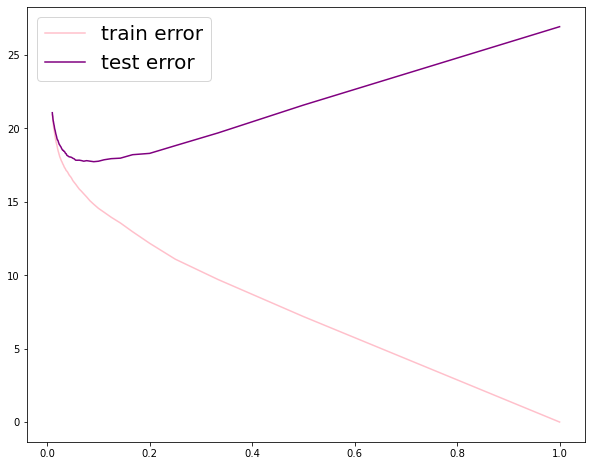

In [271]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

# normalized features regression
normalized_x_train = preprocessing.normalize(x_train)
normalized_x_test = preprocessing.normalize(x_test)

trainError = []
testError = []
k = []
for i in range(1, 101, 1):
    k.append(1/i)
    neigh = KNeighborsRegressor(n_neighbors = i).fit(normalized_x_train,y_train)
    
    y_train_pred = neigh.predict(normalized_x_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    trainError.append(train_error)
    
    y_test_pred = neigh.predict(normalized_x_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    testError.append(test_error)

plt.figure(figsize=(10,8))
plt.plot(k, trainError, color = 'pink', label = 'train error')
plt.plot(k, testError, color = 'purple', label = 'test error')
plt.legend(prop={'size': 20})
plt.show()
    

In [272]:
print("The best k is:",int(1/k[testError.index(min(testError))]), "with a MSE of", min(testError))

The best k is: 11 with a MSE of 17.735888739777376


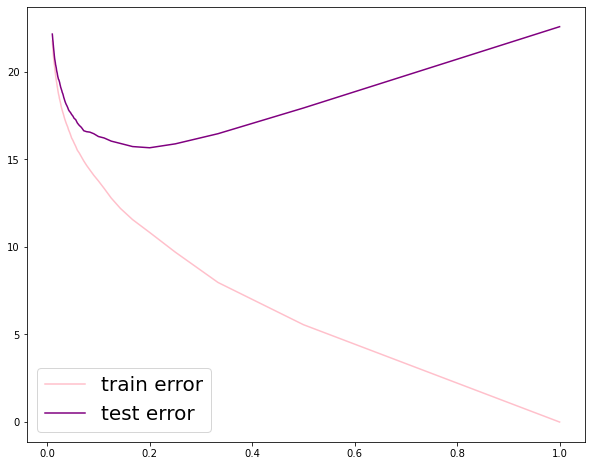

In [273]:
# raw features regression

trainError = []
testError = []
k = []
for i in range(1, 101, 1):
    k.append(1/i)
    neigh = KNeighborsRegressor(n_neighbors = i).fit(x_train,y_train)
    
    y_train_pred = neigh.predict(x_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    trainError.append(train_error)
    
    y_test_pred = neigh.predict(x_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    testError.append(test_error)

plt.figure(figsize=(10,8))
plt.plot(k, trainError, color = 'pink', label = 'train error')
plt.plot(k, testError, color = 'purple', label = 'test error')
plt.legend(prop={'size': 20})
plt.show()

In [274]:
print("The best k is:",int(1/k[testError.index(min(testError))]), "with a MSE of", min(testError))

The best k is: 5 with a MSE of 15.6635051689307


(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

<b>The MSE for test datasets of Multi-linear regression model with 70% training data and 30% test data is around 17.565669596611773. Whereas the MSE for test datasets of KNN regression model with same training and test raw data ratio came out to be 15.6635051689307. 
Therefore, the KNN Regression model has a better performance than the Multi-linear Regression model. </b>

ISRL: 2.4.1

<b>(a) When the sample size n is large and the number of predictors p is small, a flexible method is preferred, because in general flexible methods requires to estimate a greater number of parameters, with less predictors in the datasets, a flexible method will not be so complicated to use, and the large sample can reduce the effect of variance.</b> 

<b>(b)This is on the contrary to question a. With extremly large predictors p, flexible method will not perform well since it needs to estimate greater number of parameters. The small sample will result in overfitting. Therefore, in this case, the flexible methods perform worse than inflexible methods. </b>

<b>(c) Apparently, flexible methods are much better than inflexible methods in this case, because the flexible methods will give more flexibility in exploring the non-linear relationship between the predictors and response. </b>

<b>(d) Flexible methods usually have a higher variance, and a single data point can greatly affect the performance of a model. Therefore, with high variance error term, flexible methods perform worse than the inflexible methods.</b> 

ISRL:2.4.7

<b>(a) 
(0,0,0) and (0,3,0) = $$\sqrt{0^2 + 3^2 + 0^2}= \sqrt{9} = 3$$
(0,0,0) and (2,0,0) = $$\sqrt{2^2 + 0^2 + 0^2}= \sqrt{4} = 2$$
(0,0,0) and (0,1,3) = $$\sqrt{0^2 + 1^2 + 3^2}= \sqrt{10} = 3.16$$
(0,0,0) and (0,1,2) = $$\sqrt{0^2 + 1^2 + 2^2}= \sqrt{5} = 2.23$$
(0,0,0) and (-1,0,1) = $$\sqrt{(-1)^2 + 0^2 + 1^2}= \sqrt{2} = 1.41$$
(0,0,0) and (1,1,1) = $$\sqrt{1^2 + 1^2 + 1^2}= \sqrt{3} = 1.73$$</b>


<b>(b) When k=1, the prediction is Green, because the nearest point to (0,0,0) is observation 5 with a euclidean distance of 1.41</b>

<b>(c)When k=3, the prediction is Red, because the top 3 nearest points are observation 2, 5, and 6. There are 2 Red and 1 Green. So, based on the majority polling decision, we pick Red. </b>

<b>(d)If the decision boundary is highly non-linear, then the best value of K is small, because with a highly non-linear model, we will have more flexibility, and since the K value is generally inversely proportional to the flexibility, so the K is small. </b>